In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using CPU


In [3]:
# import your image
img_path = 'Pictures/WorldMap.png'

In [4]:
# Load color image
bgr_img = cv2.imread(img_path)

In [5]:
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

In [10]:
small_img = cv2.resize(gray_img, (600, 200), interpolation=cv2.INTER_LINEAR)

In [11]:
# Rescale entries to lie in [0, 1]
small_img = small_img.astype("float32")/255

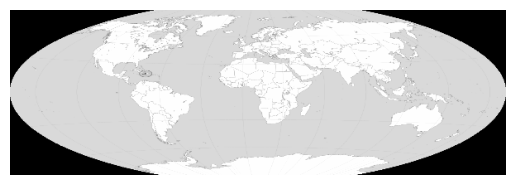

In [12]:
# Plot image
plt.imshow(small_img, cmap='gray')
plt.axis('off');

In [14]:
#Specifying the filters
filter_vals = np.array([[-1, -1, 1, 1],
                       [-1, -1, 1, 1],
                       [-1, -1, 1, 1],
                       [-1, -1, 1, 1]])

In [15]:
# Define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

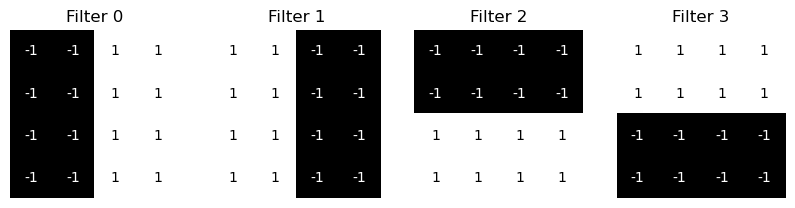

In [16]:
# Visualize all filters
fig, axes = plt.subplots(ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='white' if filters[i][x][y]<0 else 'black')

(-0.5, 599.5, 199.5, -0.5)

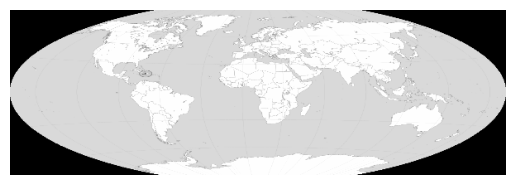

In [18]:
#Visualizing the Activation Maps for Each Filter
plt.imshow(small_img, cmap='gray')
plt.axis('off')

In [21]:
# Defining our single-layer CNN
cnn = Sequential([
    Convolution2D(1, (4, 4), 
                  activation='relu', 
                  input_shape=(small_img.shape[0], small_img.shape[1], 1))
])

In [22]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 197, 597, 1)         │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    cnn.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(cnn.predict(np.reshape(img, (1, img.shape[0], img_shape[1], 1)))), cmap='gray')

NameError: name 'img_shape' is not defined

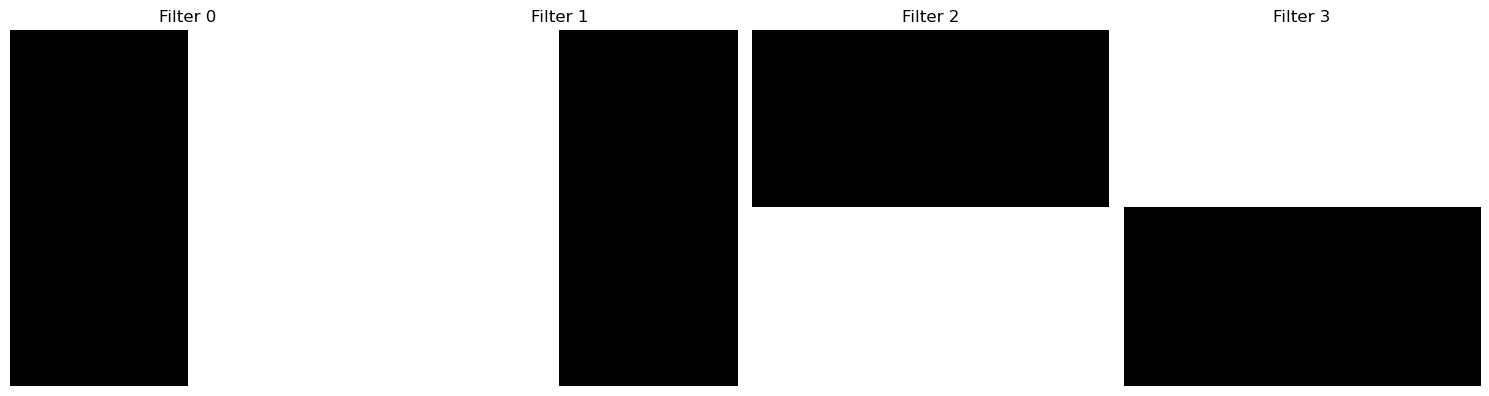

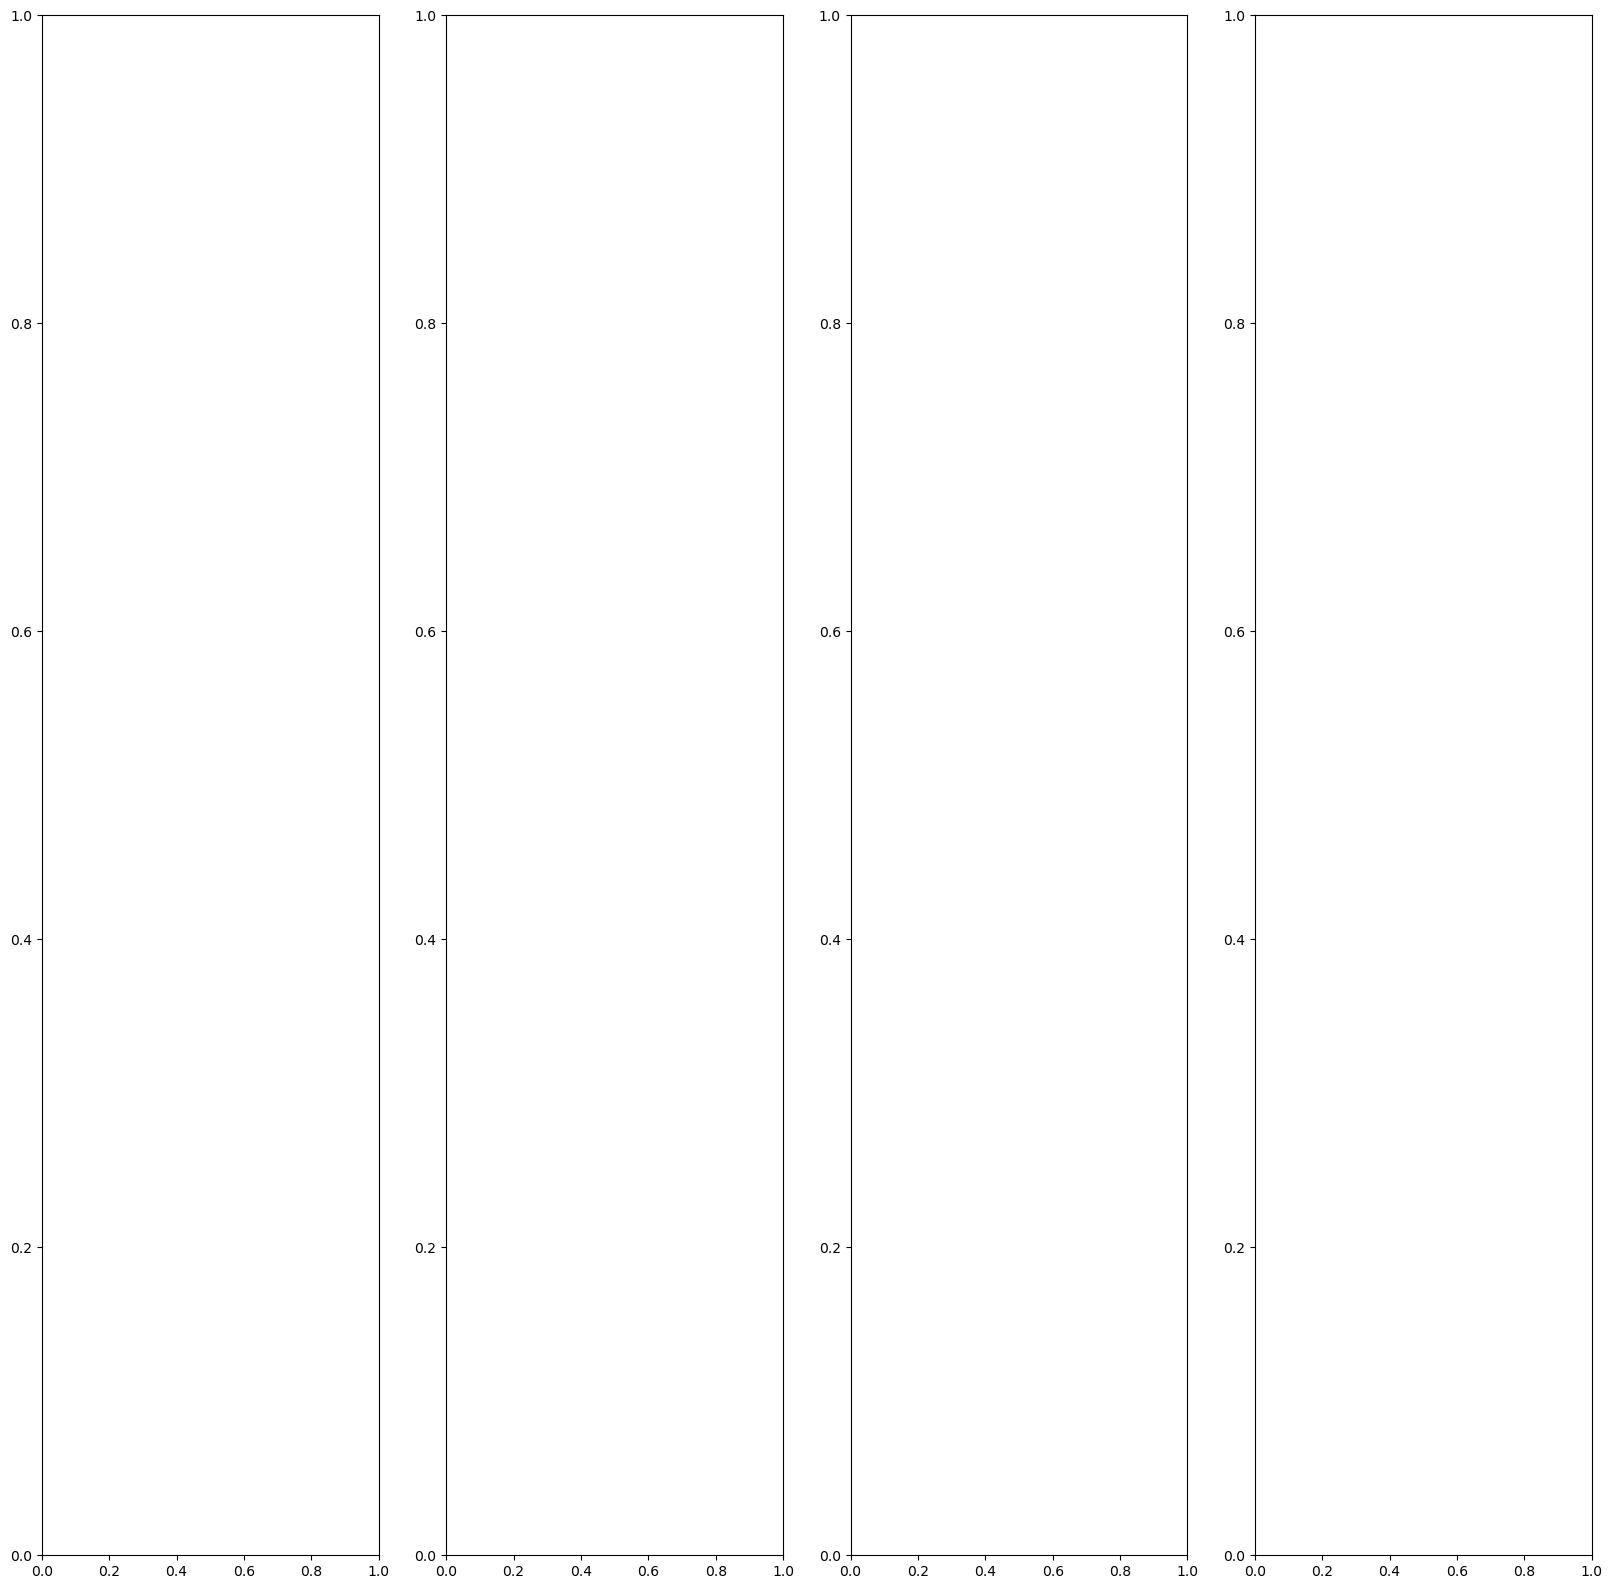

In [25]:
# Visualize all filters
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
fig.tight_layout()

# visualize all activation maps
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
for i, ax in enumerate(axes):
    apply_filter(small_img, i, filters, ax)
    ax.axis('off')
    ax.set_title(f'Activation Map for Filter {i}')
fig.tight_layout()